In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ls /home/dcor/niskhizov/ | grep gan_unet

In [3]:
from torchvision import transforms

tt = transforms.ToTensor()

### pairing

In [4]:
camera_index = 0

cap = cv2.VideoCapture(camera_index, cv2.CAP_DSHOW) # this is the magic!


In [5]:
from IPython.display import display, Image, clear_output

In [27]:
import time
def plot_img(img,c='red'):
    # plt.imshow(img.transpose(1,0,2))
    cv2.imshow('a', cv2.cvtColor(img.transpose(1,0,2), cv2.COLOR_RGB2BGR))
    cv2.waitKey(1)
    # plt.axis('off')
    # plt.gca().xaxis.set_major_locator(plt.NullLocator())
    # plt.gca().yaxis.set_major_locator(plt.NullLocator())
    # plt.gcf().set_facecolor(c)
    # plt.show()

In [28]:
for k in range(5):
    ret, frame = cap.read()
if not ret:
    print("Failed to grab frame")
else:
    orig_ref_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    

In [854]:
import time
from tqdm import tqdm

secondary_screen_width, secondary_screen_height = 600, 300 
scale = 1

pattern = np.zeros((secondary_screen_width//scale, secondary_screen_height//scale,3),dtype=np.uint8) 




cv2.destroyAllWindows()

clear_output()

print('capturing base')

time.sleep(1)


for k in range(5):
    ret, frame = cap.read()
if not ret:
    print("Failed to grab frame")
else:
    orig_ref_frame_for_saving = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    

capturing base


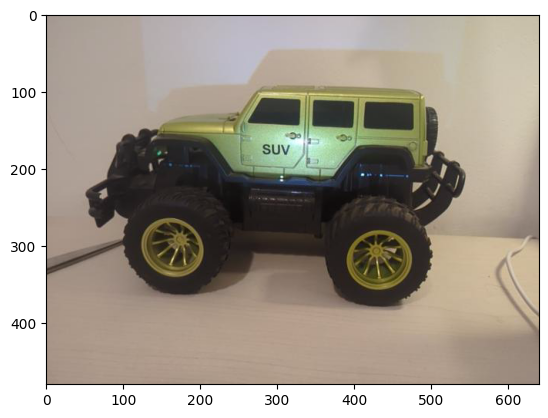

In [855]:
plt.imshow(orig_ref_frame_for_saving)


In [856]:

jumps = 15

In [858]:

caps_x = []
caps_y = []


pattern = np.zeros((secondary_screen_width//scale, secondary_screen_height//scale,3),dtype=np.uint8) 
plot_img(pattern)


for k in range(5):
    ret, frame = cap.read()
if not ret:
    print("Failed to grab frame")
else:
    orig_ref_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

time.sleep(3)

clear_output()
print('capturing black base')
pattern = np.zeros((secondary_screen_width//scale, secondary_screen_height//scale,3),dtype=np.uint8) 
red = np.zeros((secondary_screen_width//scale, secondary_screen_height//scale,3),dtype=np.uint8)
red[:,:,0] = 255
plot_img(red)
time.sleep(3)


for k in range(5):
    ret, frame = cap.read()
if not ret:
    print("Failed to grab frame")
else:
    orig_ref_frame_red = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    

for i in tqdm(range(0,pattern.shape[0],jumps)):
    pattern = np.zeros((secondary_screen_width//scale, secondary_screen_height//scale,3),dtype=np.uint8) 
    pattern[i:i+1,:,0] = 255
    
    plot_img(pattern,'black')

    time.sleep(0.1)
    for k in range(5):
        ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
    else:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        caps_x.append(frame)



for i in tqdm(range(0,pattern.shape[1],jumps)):
    pattern = np.zeros((secondary_screen_width//scale, secondary_screen_height//scale,3),dtype=np.uint8) 
    pattern[:,i:i+1,0] = 255
    
    plot_img(pattern,'black')

    time.sleep(0.1)
    for k in range(5):
        ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
    else:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        caps_y.append(frame)



capturing black base


100%|██████████| 20/20 [00:04<00:00,  4.34it/s]


In [859]:

def find_rectangles(frame):
    blurred = cv2.GaussianBlur(frame, (5, 5), 0)
    # edges = cv2.Canny(frame, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(blurred, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    rectangles = []
    
    for contour in contours:
        # Approximate the contour
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Check if it's a rectangle
        if len(approx) == 4 and cv2.isContourConvex(approx):
            # Calculate the aspect ratio and area
            area = cv2.contourArea(approx)
            print(area)
            if area > 100:  # Filter small shapes
                # check if the rectangle is black
                x, y, w, h = cv2.boundingRect(approx)
                # chuck if rectangles lines are white
                # if frame[y:y+h, x:x+w].mean() < 250:
                rectangles.append(approx)
        # return the bigest rectangle
    if len(rectangles) > 0:
        rectangles = max(rectangles, key=cv2.contourArea)
    else:
        rectangles = []
        
    return rectangles    

In [860]:
import copy

In [864]:
frame = copy.deepcopy(orig_ref_frame_red)
red_mask = (orig_ref_frame_red[:,:,0] > 220).astype(np.uint8)

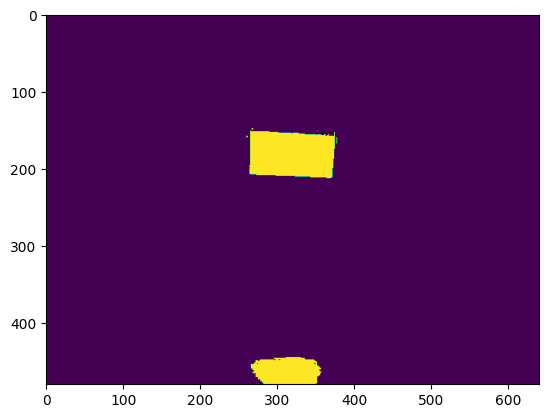

In [865]:
plt.imshow(red_mask)

In [866]:
rect = find_rectangles(red_mask)

5758.0


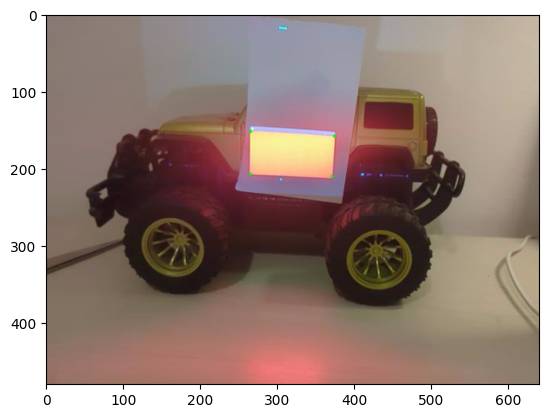

In [867]:
plt.imshow(frame)
# add a rectangle to the image
cv2.drawContours(frame, rect, -1, (0, 255, 0), 3)
plt.imshow(frame)

In [871]:
margin =  4
max_w = rect[:,0,:][:,0].max() - margin
min_w = rect[:,0,:][:,0].min() + margin
max_h = rect[:,0,:][:,1].max() - margin
min_h = rect[:,0,:][:,1].min() + margin 


In [872]:
ref_frame = cv2.cvtColor(orig_ref_frame[min_h:max_h,min_w:max_w], cv2.COLOR_BGR2GRAY)

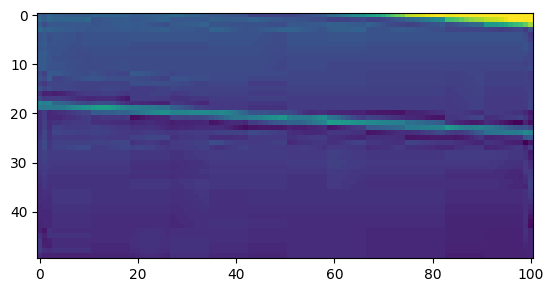

In [873]:
plt.imshow(ref_frame)

In [876]:
positions = []
counter = 0
from tqdm import tqdm_notebook as tqdm

pbar = tqdm(total=len(caps_x)*len(caps_y))

edges_ref = cv2.Canny(ref_frame, 50, 150, apertureSize=3)

for x in range(len(caps_x)):
    for y in range(len(caps_y)):   
        #find vertical line in caps_x and horizontal line in caps_y

        # rect_caps_x = cv2.cvtColor( caps_x[x][min_h:max_h,min_w:max_w,:], cv2.COLOR_BGR2GRAY)
        # rect_caps_y = cv2.cvtColor( caps_y[y][min_h:max_h,min_w:max_w,:], cv2.COLOR_BGR2GRAY)
        rect_caps_x =caps_x[x][min_h:max_h,min_w:max_w,0]
        rect_caps_y =caps_y[y][min_h:max_h,min_w:max_w,0]

        rect_caps_x = rect_caps_x * (rect_caps_x>220)
        rect_caps_y = rect_caps_y * (rect_caps_y>220)
        

        # d_x = rect_caps_x-ref_frame

        # d_x = d_x* ( (d_x < 200) * (d_x > 10))

        # d_y = rect_caps_y-ref_frame

        # d_y = d_y* ( (d_y < 200) * (d_y > 10))
    
        # edges_x = cv2.Canny(rect_caps_x, 50, 150, apertureSize=3)
        # edges_y = cv2.Canny(rect_caps_y, 50, 150, apertureSize=3)
        # if edges_x.max() != 255 or edges_y.max() != 255:
        #     # print('bad frame')
        #     continue
        
        # # idx_x, idx_y = np.array(((edges_x == 255) * (edges_y == 255)).nonzero()).T.mean(0).astype(int)
        # lines = cv2.HoughLinesP(image=edges_y-edges_ref,rho=1,theta=np.pi/180, threshold=20,minLineLength=10)#,lines=np.array([]), minLineLength=1,maxLineGap=80)
        # if lines is None:
        #     print ('no y lines')
        #     if y > 10:
        #         raise
        #     continue
        # a,b,c = lines.shape
        # edges_y_l = copy.deepcopy(edges_y)*0
        # for i in range(a):
        #     cv2.line(edges_y_l, (0, lines[i][0][1]), (edges_y.shape[1], lines[i][0][3]), 255, 1, cv2.LINE_AA)

        # lines = cv2.HoughLinesP(image=edges_x-edges_ref,rho=1,theta=np.pi/180, threshold=20,minLineLength=10)#,lines=np.array([]), minLineLength=1,maxLineGap=80)
        # if lines is None:
        #     print ('no x lines')
        #     if x > 15:
        #         raise
        #     continue
        # a,b,c = lines.shape
        # edges_x_l = copy.deepcopy(edges_x)*0
        # for i in range(a):
        #     cv2.line(edges_x_l, (lines[i][0][0], 0), (lines[i][0][2],edges_x.shape[0]), 255, 1, cv2.LINE_AA)

        # edges_cut = (rect_caps_x+rect_caps_y).argmax()#(edges_x_l* edges_y_l).argmax()
        m = (rect_caps_x.astype(float) + rect_caps_y.astype(float)-2*ref_frame.astype(float))

        edges_cut = m.argmax()

        # print(m.max())
        # if m.max() < 140:
        #     continue
        edges_cut_idx = np.unravel_index(edges_cut,rect_caps_y.shape)

        idx_x, idx_y = edges_cut_idx

        if idx_x < 0 or idx_y < 0:
            continue

      
        orig_idx_y = idx_x + min_h
        orig_idx_x = idx_y + min_w
        # comb = edges_x + edges_y
        positions.append(((x * jumps,y * jumps),(orig_idx_x,orig_idx_y)))
        counter +=1 
        pbar.update(1)
        # if counter % 1000 == 0:
        #     plt.imshow(comb)
        #     plt.scatter(idx_y,idx_x)
        #     plt.show()

C:\Users\danny\AppData\Local\Temp\ipykernel_16136\2666860460.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  pbar = tqdm(total=len(caps_x)*len(caps_y))


  0%|          | 0/800 [00:00<?, ?it/s]

In [877]:
original_points = np.array([x[0] for x in positions])
new_points = np.array([x[1] for x in positions])

h_scale = np.zeros(new_points[:,0].max()+1)
w_scale = np.zeros(new_points[:,1].max()+1)
balanced_new_points = []
balanced_original_points = []
for i in range(len(new_points)):
    x,y = new_points[i]
    # if h_scale[x] > 100 and w_scale[y] > 100 :
    #     continue

    h_scale[x] += 1
    w_scale[y] += 1
    balanced_new_points.append((x,y))
    balanced_original_points.append(original_points[i])

balanced_new_points = np.array(balanced_new_points)
balanced_original_points = np.array(balanced_original_points)


org_new_pairs = list(zip(original_points, new_points))
# sample 10% of the points
import random
sampled_pairs = random.sample(org_new_pairs, int(len(org_new_pairs)*0.1))
original_points_sampled, new_points_sampled = zip(*sampled_pairs)

original_points_sampled = np.array(original_points_sampled)
new_points_sampled = np.array(new_points_sampled)


In [878]:
# plt.hist(balanced_new_points[:,0],bins=100)

In [879]:
# H, _ = cv2.findHomography(original_points_sampled, new_points_sampled, cv2.RANSAC )

H, _ = cv2.findHomography(balanced_original_points.astype(np.float64), balanced_new_points.astype(np.float64), cv2.RANSAC )


In [880]:
print(new_points[:,1].max())
print(new_points[:,1].min())

205
156


In [881]:
print(new_points[:,0].max())
print(new_points[:,0].min())

369
269


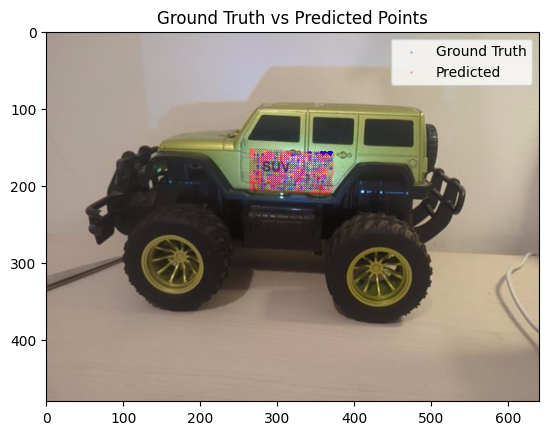

In [884]:
import cv2
import matplotlib.pyplot as plt

# Warp original points
warped_points_pred = cv2.perspectiveTransform(balanced_original_points.reshape(-1, 1, 2).astype(np.float64), H)

# Plot on the captured image
# plt.imshow(new_points, cmap='gray')
plt.imshow(orig_ref_frame_for_saving)
plt.scatter(balanced_new_points[:, 0], balanced_new_points[:, 1], c='blue', label='Ground Truth', s=0.05)
# plt.scatter(new_points_sampled[:, 0], new_points_sampled[:, 1], c='blue', label='Ground Truth', s=0.05)
plt.scatter(warped_points_pred[:, 0, 0], warped_points_pred[:, 0, 1], c='red', label='Predicted', s=0.05)
plt.legend()
plt.title('Ground Truth vs Predicted Points')
plt.show()

In [885]:
im_dst = cv2.warpPerspective(   255+0*pattern.transpose(1,0,2), H, (frame.T.shape[1], frame.T.shape[2]))

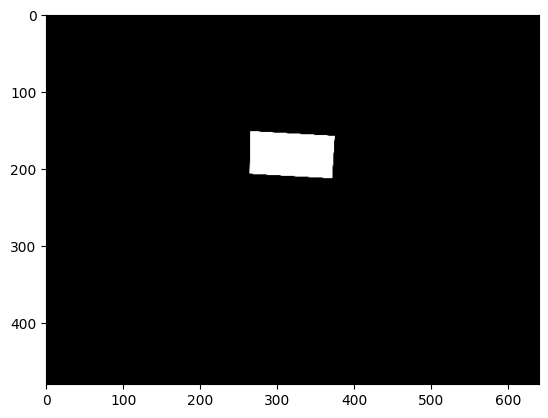

In [886]:
plt.imshow(im_dst)

In [ ]:
im_dst.shape

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)*0.5+im_dst[:,:,0]*0.5)

In [888]:
import os
import pickle

In [889]:
os.makedirs('./calibration_dump',exist_ok=True)

In [890]:
# dump and dump orig_ref_frame
import pickle
with open('./calibration_dump/calibration3.pickle','wb') as f:
    pickle.dump(H,f)


In [ ]:
plt.imshow(orig_ref_frame)

In [891]:
with open('./calibration_dump/orig_ref_frame3.pickle','wb') as f:
    pickle.dump(orig_ref_frame_for_saving,f)

## Training

In [ ]:
cd /home/dcor/niskhizov/AdversarialRendering/

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from peft import LoraConfig, get_peft_model

class LoRA_U_Net(nn.Module):
    def __init__(self):
        super(LoRA_U_Net, self).__init__()
        self.unet = models.segmentation.deeplabv3_mobilenet_v3_large(pretrained=True)
        
        # Modify classifier for image prediction task (3 output channels for RGB)
        self.unet.classifier[4] = nn.Conv2d(256, 3, kernel_size=1)

        # # Apply LoRA to the convolution layers
        # config = LoraConfig(
        #     r=8,  # Low-rank parameter
        #     lora_alpha=16,
        #     lora_dropout=0.05,
        #     target_modules=["conv1"]  # Apply LoRA to deeper layers
        # )

        # self.unet = get_peft_model(self.unet, config)

    def forward(self, x):
        o = self.unet(x)['out'] + x  # Residual Learning
        # o = (o - o.min()) / (o.max() - o.min())  # Normalize to [0, 1]
        return o.clamp(0,1)

# Load model
net = LoRA_U_Net().cuda()
# Load weights
net.load_state_dict(torch.load("/home/dcor/niskhizov/lora_mobile_unet4.pth"))

net = net.eval()

In [ ]:
import pickle
from torchvision import transforms
import matplotlib.pyplot as plt
tt = transforms.ToTensor()
# load data from calibration
with open('./calibration_dump/calibration2.pickle','rb') as f:
    H = pickle.load(f)
with open('./calibration_dump/orig_ref_frame2.pickle','rb') as f:
    orig_ref_frame = pickle.load(f)

In [ ]:
orig_ref_frame_tensor = tt(orig_ref_frame).unsqueeze(0).cuda()

In [ ]:
orig_ref_frame_tensor.shape

In [ ]:
o = net(orig_ref_frame_tensor)


In [ ]:
plt.imshow(orig_ref_frame_tensor.cpu().detach().squeeze().permute(1,2,0))

In [ ]:
plt.imshow(net(orig_ref_frame_tensor).cpu().detach().squeeze().permute(1,2,0))

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(o.cpu().detach().numpy().squeeze().transpose(1,2,0))

In [ ]:
import torch
import torch.nn.functional as F
import kornia
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Load stable diffusion model
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
vae=  pipe.vae
vae = vae.to(device)
def decode_latents(latents):
    # latents = F.interpolate(latents, (64, 64), mode='bilinear', align_corners=False)
    with torch.no_grad():
        with torch.amp.autocast(device):
            latents = 1 / 0.18215 * latents

            with torch.no_grad():
                imgs = vae.decode(latents).sample

            # imgs = (imgs / 2 + 0.5).clamp(0, 1)

    return imgs

def encode_imgs(imgs):
    # imgs: [B, 3, H, W]
    with torch.no_grad():
        with torch.amp.autocast(device):
            # imgs = 2 * imgs - 1

            posterior = vae.encode(imgs).latent_dist
            latents = posterior.sample() * 0.18215

    return latents

In [ ]:
import utils.classfier

In [ ]:
from utils.classfier import *
# from utils.gan import *
# net = Generator()
# # net.load_state_dict(torch.load("./calibration_dump//patch_patterns_gan_unet_31.pth"))
# net.load_state_dict(torch.load("/home/dcor/niskhizov/patch_caltec_patterns_gan_unet_140.pth"))

net = net.eval().cuda()
# freeze the model
for param in net.parameters():
    param.requires_grad = False

In [ ]:
from torch import nn
import torch
def gaussian_kernel(size: int, sigma: float):
    """Generates a 2D Gaussian kernel."""
    coords = torch.arange(size).float()
    coords -= (size - 1) / 2.0
    g = torch.exp(-coords.pow(2) / (2 * sigma ** 2))
    g = g / g.sum()  # Normalize
    g_2d = g.unsqueeze(0) * g.unsqueeze(1)  # Outer product to create 2D kernel
    return g_2d

# Create Gaussian kernel
kernel_size = 71  # Kernel size (odd number)
sigma = 70        # Standard deviation of the Gaussian
num_noises = 1
gaussian_filter = gaussian_kernel(kernel_size, sigma).unsqueeze(0).unsqueeze(0).repeat(3,1,1,1)

conv_layer = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=kernel_size,
                       padding=kernel_size // 2, bias=False,
                       padding_mode='circular', groups=3)

conv_layer.weight.data = gaussian_filter

conv_layer.to('cuda')

def apply_low_freq_noise(x):
    # with torch.no_grad():
        """Generates low-frequency noise."""
        noise = 255 * conv_layer(x)
        return noise
    
def gen_low_freq_noise():
    with torch.no_grad():
        """Generates low-frequency noise."""
        noise = 255*torch.randn(1, 3, 300, 600).cuda()
        noise = conv_layer(noise)
        return noise

In [ ]:
import torch
import torchvision.transforms as T
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T

class PrintPhotographEffect:
    def __init__(self):
        self.downscale = T.Resize((300, 300))  # Simulate low-res printing
        self.upscale = T.Resize((1024, 1024))  # Upscale back to original size
        self.add_noise = T.Lambda(self._add_noise)  # Add random noise
        self.gaussian_blur = T.GaussianBlur(kernel_size=(5,5), sigma=(1.0, 4.0))  # Blur
        self.adjust_contrast = T.Lambda(self._adjust_contrast)  # Contrast adjustment
        self.vignette = T.Lambda(self._add_vignette)  # Vignette effect
        self.jitter = T.ColorJitter(brightness=0.5,contrast=0.5,saturation=0.5)
        # self.perspective_transformer = v2.RandomPerspective(distortion_scale=0.2, p=1.0)

    def _add_noise(self, img):
        rnd_scale = torch.FloatTensor(1).uniform_(0.01, 0.2).to(img.device)
        noise = torch.randn_like(img) * rnd_scale  # Gaussian noise
        return torch.clamp(img + noise, 0, 1)

    def _adjust_contrast(self, img,factor=1.2):
        factor = factor  # Slightly increase contrast
        mean = torch.mean(img, dim=(-2, -1), keepdim=True)
        return torch.clamp((img - mean) * factor + mean, 0, 1)

    def _add_vignette(self, img):
        _, height, width = img.shape
        y, x = torch.meshgrid(
            torch.linspace(-1, 1, height, device=img.device),
            torch.linspace(-1, 1, width, device=img.device)
        )
        vignette = 1 - torch.sqrt(x**2 + y**2)
        vignette = vignette.to(img.device).unsqueeze(0)  # Add channel dimension
        return torch.clamp(img * vignette, 0, 1)

    def __call__(self, img,upscale_first=False):
        # img = img.permute(2,1,0)
        # img = self.downscale(img)
        # if upscale_first:
        #   img = self.upscale(img)

        img = self.add_noise(img)

        img = self.gaussian_blur(img)

        # img = self.adjust_contrast(img)

        img = self.jitter(img)
        # img = self.vignette(img)

        # img = self.perspective_transformer(img)
        # if not upscale_first:
        #   img = self.upscale(img)

        return img#.permute(2,1,0)

effect = PrintPhotographEffect()

In [ ]:
orig_ref_frame.shape

In [ ]:
H_t = torch.tensor(H).float().unsqueeze(0).cuda()
def warp(img):
    return kornia.geometry.transform.warp_perspective(img, H_t, (orig_ref_frame.shape[0], orig_ref_frame.shape[1]))

In [ ]:
# torch_dst = kornia.geometry.transform.warp_perspective(img_tensor.unsqueeze(0), torch.tensor(H).float().unsqueeze(0).cuda(), (frame.shape[0], frame.shape[1]))

In [ ]:
# plt.imshow(torch_dst.cpu()[0].permute(1, 2, 0).numpy())

In [ ]:
adv_patch = torch.rand(1, 3, 300, 600).cuda() - 0.5
adv_patch.requires_grad = True


In [ ]:
adv_patch_lpf = apply_low_freq_noise(adv_patch)[0].detach().unsqueeze(0).clamp(0, 0.3922)

In [ ]:
adv_patch_lpf.max()

In [ ]:
net(adv_patch_lpf).max()

In [ ]:
adv_patch_lpf_aug = net(adv_patch_lpf)

In [ ]:
w  =warp(adv_patch_lpf_aug)

In [ ]:
adv_patch_lpf[0].shape

In [ ]:
wt = w.cpu()[0].permute(1, 2, 0).numpy()
plt.imshow(adv_patch_lpf.cpu()[0].permute(1, 2, 0).numpy())
plt.show()
plt.imshow(adv_patch_lpf_aug.cpu()[0].permute(1, 2, 0).numpy())
plt.show()
plt.imshow(effect(adv_patch_lpf_aug).cpu()[0].permute(1, 2, 0).numpy())
plt.show()
plt.imshow(wt)
plt.show()
plt.imshow( ((wt != 0) * -0.5 + 1) * orig_ref_frame / 255 + wt*0.5)
plt.show()

In [ ]:
import tqdm

In [ ]:
back_resizer = torchvision.transforms.Resize((52, 92))

In [ ]:
# plt.imshow(net(adv_patch_lpf)[0].detach().cpu().permute(1,2,0))

In [ ]:
# plot hist of adv_patch
# plt.hist(adv_patch.detach().cpu().numpy().flatten(), bins=100)

In [ ]:
ref_tensor = torch.tensor(orig_ref_frame.transpose(2,0,1)).float().cuda().unsqueeze(0) / 255

In [ ]:
# adv_patch = torch.rand(1, 3, 300, 600).cuda() - 0.5
# adv_patch.requires_grad = True

resizer =  torchvision.transforms.Resize((300, 600))
latent = torch.rand((1,4, 16, 16), device=device, requires_grad=True)

opt = torch.optim.Adam([latent], lr=0.5)
# opt = torch.optim.SGD([latent], lr=50)


In [ ]:
with torch.no_grad():
    print(vae.decode(latent).sample.shape)

In [ ]:
adv_patch.shape

In [ ]:
# opt = torch.optim.Adam([adv_patch], lr=0.1)

In [ ]:
adv_patch.max()

In [ ]:
    # aug = 'None'
    # if np.random.rand() > 0.2:
    #     if np.random.rand() > 0.5:
    #         adv_patch_lpf_aug = net(adv_patch_lpf)
    #         aug = 'net'
    #     else:
    #         adv_patch_lpf_aug = effect(adv_patch_lpf)
    #         aug = 'effect'
    # else:
    #     adv_patch_lpf_aug = adv_patch_lpf

In [ ]:
def aug_func(adv_patch_lpf,type):
    if type == 'net':
        return net(adv_patch_lpf)
    if type == 'effect':
        return effect(adv_patch_lpf)
    return adv_patch_lpf

In [ ]:
# orig_clases = [torch.tensor([x]*batch_size).cuda() for x in [817, 705, 609, 586, 436, 627, 468, 621, 803, 407, 408, 751, 717, 864,866, 661]]
target_class = torch.tensor([980]).cuda()
critereon = torch.nn.CrossEntropyLoss()

def adv_loss_calc(image):
    adv_loss = 0
    pred = resnet_predict_raw(image)
    if not target_class:
      for p in pred:
        adv_loss += torch.stack([p[c.item()] for c in orig_clases]).mean() / pred.shape[0]
      return adv_loss
    else:
      adv_loss =  critereon(pred, target_class) / 100
    return adv_loss

In [ ]:
w_mask  =warp(adv_patch_lpf*0+1)
w  =warp(adv_patch_lpf)
sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5

plt.imshow(sum_tensor.detach().cpu()[0].permute(1,2,0).numpy())

In [58]:
import tqdm
for i in tqdm.tqdm(range(10000,1000000)):

    opt.zero_grad()

    width_aug = torch.rand(1)[0] * 200 - 100
    height_aug = torch.rand(1)[0] * 200 - 100

    resizer_aug =  torchvision.transforms.Resize((300 - int(height_aug), 600 - int(width_aug)))                     

    adv_patch = vae.decode(latent).sample.clamp(0,0.3922)
    
    patch_norm = adv_patch.norm() / 20
    # adv_patch = adv_patch / adv_patch.std()

    # adv_patch = adv_patch * 0.3922
    # adv_patch_norm = (adv_patch - adv_patch.mean()) / adv_patch.std()
    


    rnd_amp = (torch.rand(1)[0] ) * 5
    adv_patch_lpf = resizer_aug(rnd_amp * effect(adv_patch))#apply_low_freq_noise(adv_patch_norm )
    # with chance 0.5 augment
    # tmp_aug = []
    # augs = ['net','effect','none']
    # for aug in augs:
    #     tmp_aug.append(aug_func(adv_patch_lpf,aug))


    # adv_patch_lpf_aug = torch.stack(tmp_aug,1)[0]

    w_mask  =warp(adv_patch_lpf*0+1)
    w  =warp(adv_patch_lpf)

    transperancy = torch.rand(1)[0].clamp(0.01,1)
    # sum_tensor =  ((w != 0) * -0.5 + 1) * ref_tensor + w*0.5
    # sum_tensor =  ((w_mask != 0) * -1 + 1) * ref_tensor + w
    # sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5
    sum_tensor =  ((w_mask != 0) * -transperancy + 1) * ref_tensor + w * transperancy
    sum_tensor_aug = net(sum_tensor)


    loss = adv_loss_calc(sum_tensor_aug.cuda()) * 1000 + patch_norm
    loss.backward()
    grad_norm = latent.grad.norm()#adv_patch.grad.norm()
    opt.step()
    if i % 10000 == 0:
            #plot the patch
            plt.imshow(adv_patch_lpf.detach().cpu()[0].permute(1,2,0))
            plt.show()
            
            plt.imshow(sum_tensor_aug.cpu().detach().squeeze().permute(1,2,0))
            # add title
            plt.show()

            plt.imshow(sum_tensor.cpu().detach().squeeze().permute(1,2,0))
            # add title
            plt.show()
            print(loss.item(),grad_norm)
            print(resnet_predict(sum_tensor_aug.cuda()))
            print(resizer_aug)
            print(transperancy)
            print(rnd_amp)
            adv_patch_r = resizer(adv_patch)
            plt.imshow(adv_patch_r[0].detach().cpu().permute(1,2,0))
            plt.axis('off')
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
            plt.gcf().set_facecolor("black")
            plt.show()

            adv_patch_r = resizer(adv_patch)
            plt.imshow(adv_patch_r[0].clamp(0,0.392).detach().cpu().permute(1,2,0))
            plt.axis('off')
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
            plt.gcf().set_facecolor("black")
            plt.show()
#     if i % 1000 == 0:
#         with torch.no_grad():
#                 # adv_patch_norm = (adv_patch - adv_patch.mean()) / adv_patch.std()
#                 adv_patch_lpf = adv_patch#apply_low_freq_noise(adv_patch_norm ).clamp(0, 0.3922)
#                 # adv_patch_lpf_aug = effect(adv_patch_lpf)
                
#                 w_mask  =warp(adv_patch_lpf*0+1)
#                 w  =warp(adv_patch_lpf)

#                 # sum_tensor =  ((w != 0) * -0.8 + 1) * ref_tensor + w*0.8
#                 # sum_tensor =  ((w_mask != 0) * -1 + 1) * ref_tensor + w
#                 sum_tensor =  ((w_mask != 0) * -0.5 + 1) * ref_tensor + w * 0.5
#                 sum_tensor_aug = net(sum_tensor)


        # print(loss.item())
        # print(resnet_predict(sum_tensor_aug.cuda()))
        # plt.imshow(sum_tensor_aug.cpu().detach().squeeze().permute(1,2,0))
        # plt.show()
            # plt.imshow(adv_patch_lpf[0].detach().cpu().permute(1,2,0))
            # plt.show()
            # plt.imshow(net(adv_patch_lpf)[0].detach().cpu().permute(1,2,0))
            # plt.show()

 77%|███████▋  | 760188/990000 [15:54:41<4:48:36, 13.27it/s]


KeyboardInterrupt: 

In [ ]:
plt.imshow(net(orig_ref_frame_tensor).cpu().detach().squeeze().permute(1,2,0))

In [ ]:
plt.imshow(sum_tensor.cpu().detach().squeeze().permute(1,2,0))

In [ ]:
torch.stack([100*p[c.item()] for c in orig_clases])

In [ ]:
plt.imshow(sum_tensor.cpu().detach().squeeze().permute(1,2,0))


In [ ]:
plt.imshow(adv_patch_lpf_aug.detach().cpu().numpy().squeeze().transpose(1,2,0))

In [ ]:
plt.imshow(adv_patch[0].detach().cpu().permute(1,2,0))

In [ ]:
adv_patch.grad

In [ ]:
adv_patch_lpf = apply_low_freq_noise(adv_patch ).clamp(0, 0.3922)


In [ ]:
adv_patch_lpf.max()

In [ ]:
adv_patch_lpf.max()

In [ ]:
# save adv_patch_lpf to adv_patch_lpf.png
adv_patch_r = resizer(adv_patch)
plt.imshow(adv_patch_r[0].clamp(0,0.392).detach().cpu().permute(1,2,0))
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gcf().set_facecolor("black")
plt.show()

In [ ]:
from pillow import Image
img = Image.fromarray(img_adv_patch_lpf)


In [ ]:
plt.imshow(adv_patch_lpf_clamp[0].detach().cpu().permute(1,2,0))
# remove axes
plt.axis('off')
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gcf().set_facecolor("red")
plt.show()
# make background red and narrow borders


In [ ]:
adv_patch_lpf = apply_low_freq_noise(adv_patch ) 


In [ ]:
plt.imshow(img_adv_patch_lpf)

In [ ]:
plt.imshow(net(adv_patch_lpf).cpu().detach().squeeze().permute(1,2,0))
plt.show()
plt.imshow(adv_patch_lpf.cpu().detach().squeeze().permute(1,2,0))
plt.show()

In [ ]:
conv_layer.weight.grad

In [ ]:
plt.imshow(adv_patch.cpu().detach().squeeze().permute(1,2,0))